In [1]:
import os
import geopandas as gpd
import pandas as pd
import numpy as np
import glob

In [2]:
# why Singapore looks weird...
ROOTFOLDER = "/lustre1/g/geog_pyloo/05_timemachine"
PANO_PATH = "{ROOTFOLDER}/GSV/gsv_rgb/{cityabbr}/gsvmeta/gsv_pano.csv"
CURATED_FOLDER = f"{ROOTFOLDER}/_curated"
META_PATH = "{ROOTFOLDER}/GSV/gsv_rgb/{cityabbr}/gsvmeta/{cityabbr}_meta.csv"

EXFOLDER = os.path.join(CURATED_FOLDER, "c_seg_crossectional_all")

In [3]:
city = "singapore"
df = pd.read_parquet(os.path.join(EXFOLDER, f"{city}.parquet"))

In [14]:
df.head()

,hex_id,img_count,0,1,2,3,4,5,6,7,...,139,140,141,142,143,144,147,148,149,res
0,88ad360001fffff,388,2492.631443,5004.097938,91635.579897,539.909794,6880.358247,88.043814,29063.108247,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,8
1,88ad360003fffff,337,1433.608309,1160.970326,91395.385757,1059.106825,1379.982196,123.575668,35774.094955,0.0,...,0.0,137.047478,0.0,0.0,0.0,0.0,0.0,0.421365,3.305638,8
2,88ad360005fffff,668,1969.335329,4664.836826,92885.073353,511.438623,7998.931138,0.000000,28594.859281,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,2.191617,8
3,88ad360007fffff,504,2923.694444,4217.182540,82292.384921,759.619048,10264.998016,0.000000,34496.888889,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.958333,26.896825,8
4,88ad36000bfffff,249,1277.180723,16.670683,88858.393574,521.453815,227.273092,0.000000,41528.590361,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.140562,8


In [15]:
df['2'].describe()

count    124529.000000
mean      90708.848683
std       42437.584591
min           0.000000
25%       64173.000000
50%       73512.375000
75%      121016.204082
max      160000.000000
Name: 2, dtype: float64

In [10]:
dfhk = pd.read_parquet(os.path.join(EXFOLDER, "hongkong.parquet"))
dfhk['1'].describe()

count     81642.000000
mean      14787.460511
std       20078.131941
min           0.000000
25%         224.375000
50%        5286.666667
75%       22798.687500
max      132316.250000
Name: 1, dtype: float64

In [4]:
def get_result(cityabbr, curated_folder, f_suffixes = "*panoptic.csv"):
    outfolder = f"{curated_folder}/{cityabbr}"
    seg_file = glob.glob(os.path.join(outfolder, f_suffixes))
    panoptic_df = []
    for p in seg_file:
        temp = pd.read_csv(p)
        panoptic_df.append(temp)
    panoptic_df = pd.concat(panoptic_df).reset_index(drop = True)
    return panoptic_df

In [5]:
# sample one city to conduct the test
cityabbr = "singapore"
ROOTFOLDER = "/lustre1/g/geog_pyloo/05_timemachine"
PANO_PATH = "{ROOTFOLDER}/GSV/gsv_rgb/{cityabbr}/gsvmeta/gsv_pano.csv"
CURATED_FOLDER = f"{ROOTFOLDER}/_curated"
META_PATH = "{ROOTFOLDER}/GSV/gsv_rgb/{cityabbr}/gsvmeta/{cityabbr}_meta.csv"

EXFOLDER = os.path.join(CURATED_FOLDER, "c_seg_crossectional")
if not os.path.exists(EXFOLDER):
    os.makedirs(EXFOLDER)
    
EXFOLDER_LONG = os.path.join(CURATED_FOLDER, "c_seg_longitudinal")
if not os.path.exists(EXFOLDER_LONG):
    os.makedirs(EXFOLDER_LONG)

# panoptic_df = get_result(cityabbr,CURATED_FOLDER, f_suffixes = "*panoptic.csv")
seg_df = get_result(cityabbr, CURATED_FOLDER, f_suffixes = "*seg.csv")

In [15]:
seg_df.shape

(1508375, 3)

In [11]:
temp = pd.read_csv(f"/lustre1/g/geog_pyloo/05_timemachine/GSV/gsv_rgb/{cityabbr}/gsvmeta/{cityabbr}_meta.csv")
print(temp.shape[0])
# temp = temp.dropna(subset = "lat").reset_index(drop = True)
print(temp.shape[0])

727274
727274


In [12]:
temp['dist_hav'].describe()

count    419666.000000
mean      12278.804612
std        6003.676663
min          11.765865
25%        7442.807135
50%       12384.680960
75%       16784.093425
max       26911.575116
Name: dist_hav, dtype: float64

In [6]:
sample_panoid = seg_df['img'].values[0][:22]
# temp[temp['panoid']=='QlSA543vApVc4UwuJ9fiBg']

In [10]:
sample_panoid

'hdu1wXoeCoaDIT7Q7TM_Lw'

/lustre1/g/geog_pyloo/05_timemachine/GSV/gsv_rgb/singapore/img_rgb/a_1/0/7/hdu1wXoeCoaDIT7Q7TM_Lw_0.jpg


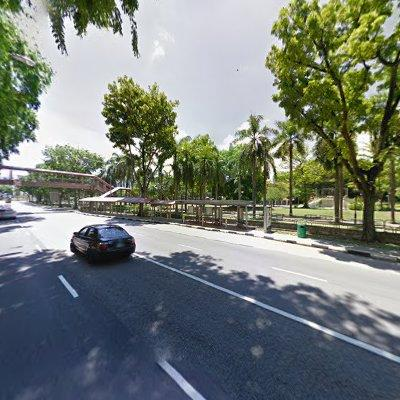

In [13]:
path_to_image = temp[temp['panoid']==sample_panoid]['path'].values[0]
print(path_to_image)
from PIL import Image
Image.open(path_to_image)

In [14]:
seg_df_sel = seg_df[seg_df['img']==f'{sample_panoid}_180']
seg_df_sel

,labels,areas,img
0,1,8788,hdu1wXoeCoaDIT7Q7TM_Lw_180
1,2,8535,hdu1wXoeCoaDIT7Q7TM_Lw_180
2,4,55454,hdu1wXoeCoaDIT7Q7TM_Lw_180
3,6,23589,hdu1wXoeCoaDIT7Q7TM_Lw_180
4,9,53376,hdu1wXoeCoaDIT7Q7TM_Lw_180
5,13,5795,hdu1wXoeCoaDIT7Q7TM_Lw_180
6,43,666,hdu1wXoeCoaDIT7Q7TM_Lw_180
7,52,3627,hdu1wXoeCoaDIT7Q7TM_Lw_180
8,87,52,hdu1wXoeCoaDIT7Q7TM_Lw_180
9,116,118,hdu1wXoeCoaDIT7Q7TM_Lw_180


In [68]:
path_to_checkpoint  = "../ckpt/250_16_swin_l_oneformer_ade20k_160k.pth"
curated_folder = "/lustre1/g/geog_pyloo/05_timemachine/_curated"
bash_c = f"""
cd /home/yuanzf/_playground/OneFormer/demo

python demo.py --config-file ../configs/ade20k/swin/oneformer_swin_large_bs16_160k.yaml \
--input {path_to_image} \
--output {curated_folder} \
--task semantic \
--opts MODEL.IS_TRAIN False MODEL.IS_DEMO True MODEL.WEIGHTS {path_to_checkpoint}
"""
print(bash_c)


cd /home/yuanzf/_playground/OneFormer/demo

python demo.py --config-file ../configs/ade20k/swin/oneformer_swin_large_bs16_160k.yaml --input /lustre1/g/geog_pyloo/05_timemachine/GSV/gsv_rgb/jakarta/img_rgb/9_1/3/4/PhgXpqOdVUxkSoFAWlI6xw_90.jpg --output /lustre1/g/geog_pyloo/05_timemachine/_curated --task semantic --opts MODEL.IS_TRAIN False MODEL.IS_DEMO True MODEL.WEIGHTS ../ckpt/250_16_swin_l_oneformer_ade20k_160k.pth

